<a href="https://colab.research.google.com/github/HSE-LAMBDA/MLatFIAN2021/blob/main/seminar11/uproot_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple uproot example

Quick intro: https://uproot.readthedocs.io/en/latest/basic.html

In [2]:
!pip install uproot awkward
!pip install xrootd # needed for accessing remote data through "root://..." links

     |████████████████████████████████| 299 kB 9.6 MB/s 
     |████████████████████████████████| 14.1 MB 67.1 MB/s 
     |████████████████████████████████| 2.9 MB 7.8 MB/s 
  Command arguments: /usr/bin/python3 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-tq8k2lv6/xrootd_96fd0a9062ab4acdbec5cb0fc15da2d6/setup.py'"'"'; __file__='"'"'/tmp/pip-install-tq8k2lv6/xrootd_96fd0a9062ab4acdbec5cb0fc15da2d6/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /tmp/pip-wheel-ttuv_hhu
  Command output:
  /usr/local/lib/python3.7/dist-packages/setuptools/dist.py:484: UserWarning: Normalizing '5.3.3
  ' to '5.3.3'
    warnings.warn(tmpl.format(**locals()))
  running bdist_wheel
  ----------------------------------------
  Running 

In [3]:
import uproot

We'll read a single file from the following CERN opendata dataset: [Samples with full event information including tracker hits for tracking, ML, and top quark tagging studies](https://opendata.cern.ch/record/12220).

In [4]:
# single file from: https://opendata.cern.ch/record/12220
file = uproot.open("root://eospublic.cern.ch//eos/opendata/cms/datascience/TrackerRecHitProducerTool/QCD300to600_RunI_8TeV/step3_QCD300to600/savehits_output_0001.root")

In [5]:
file.keys()

['hits_tree;24', 'hits_tree;23', 'hits_tree;22']

In [6]:
file.classnames()

{'hits_tree;22': 'TTree', 'hits_tree;23': 'TTree', 'hits_tree;24': 'TTree'}

In [7]:
tree = file["hits_tree;24"]

In [8]:
tree.num_entries

600

In [9]:
tree.keys(filter_name=lambda x: "hit" in x.lower())

['hit_global_x',
 'hit_global_y',
 'hit_global_z',
 'hit_local_x',
 'hit_local_y',
 'hit_local_x_error',
 'hit_local_y_error',
 'hit_sub_det',
 'hit_layer',
 'hit_type',
 'hit_simtrack_id',
 'hit_simtrack_index',
 'hit_simtrack_match',
 'hit_genparticle_id',
 'hit_pdgid',
 'hit_recotrack_id',
 'hit_recotrack_match',
 'hit_genparticle_match',
 'hit_genjet_id',
 'hit_genjet_match',
 'track_hitsvalid',
 'track_hitslost',
 'track_hit_global_x',
 'track_hit_global_y',
 'track_hit_global_z',
 'track_hit_local_x',
 'track_hit_local_y',
 'track_hit_local_x_error',
 'track_hit_local_y_error',
 'track_hit_sub_det',
 'track_hit_layer']

In [10]:
tree.show(interpretation_width=50)

name                 | typename                 | interpretation                                    
---------------------+--------------------------+---------------------------------------------------
hit_global_x         | std::vector<float>       | AsJagged(AsDtype('>f4'), header_bytes=10)
hit_global_y         | std::vector<float>       | AsJagged(AsDtype('>f4'), header_bytes=10)
hit_global_z         | std::vector<float>       | AsJagged(AsDtype('>f4'), header_bytes=10)
hit_local_x          | std::vector<float>       | AsJagged(AsDtype('>f4'), header_bytes=10)
hit_local_y          | std::vector<float>       | AsJagged(AsDtype('>f4'), header_bytes=10)
hit_local_x_error    | std::vector<float>       | AsJagged(AsDtype('>f4'), header_bytes=10)
hit_local_y_error    | std::vector<float>       | AsJagged(AsDtype('>f4'), header_bytes=10)
hit_sub_det          | std::vector<uint32_t>    | AsJagged(AsDtype('>u4'), header_bytes=10)
hit_layer            | std::vector<uint32_t>    | AsJagged(AsD

Pick a single branch and represent it as an array:

In [11]:
simtrack_pdgid_array = tree["simtrack_pdgid"].array(library="np")
print(type(simtrack_pdgid_array))
print(simtrack_pdgid_array.shape)
print(simtrack_pdgid_array.dtype)
print(simtrack_pdgid_array[:5])

<class 'numpy.ndarray'>
(600,)
object
[array([ -211,   211, -2212,  2212, -2112,  3122,  -211,   211,   211,
        -211,  -211,   211,  -211,  -211,   211,  -211,  -211,  -211,
       -2112,  2112,  -211,   211,  -211,   211,  -211,   321,   211,
       -2212,  2112,   321,  -211,  -211,   211,  -211,   211,   211,
        -211,   211,   211,  -211,   211,    22,    22,  -211,   211,
        -211,   211,  -211,   321,  -211,    22,    22,   211,  -211,
         211,   211,  -211,  -211,   211,  -211,  -211,   211,   211,
        -211,  -211,   211,  -211,   211,   211,  -211,   211,  -211,
         211,  -211,    22,    22,   211,   211, -2212,   211,  2212,
        -211,  -211,   211,   211,  -211,    22,    22,    22,   310,
         310,    22,   321,  -211,    22,    22,   211,   211,  -211,
        -211,   211,   211,  -211,   211,  -211,   130,   321,   211,
        -211,  -211,   211,   211,  -211,    22,    22,   211,  -211,
         211,  -211,   211,  -211,   211,   211,  -

Iterate through single events:

In [12]:
single_event_data = next(iter(tree.iterate(library="np", step_size=1)))
print(type(single_event_data))
print(single_event_data.keys())
print(single_event_data["hit_global_x"])

<class 'dict'>
dict_keys(['hit_global_x', 'hit_global_y', 'hit_global_z', 'hit_local_x', 'hit_local_y', 'hit_local_x_error', 'hit_local_y_error', 'hit_sub_det', 'hit_layer', 'hit_type', 'hit_simtrack_id', 'hit_simtrack_index', 'hit_simtrack_match', 'hit_genparticle_id', 'hit_pdgid', 'hit_recotrack_id', 'hit_recotrack_match', 'hit_genparticle_match', 'hit_genjet_id', 'hit_genjet_match', 'simtrack_id', 'simtrack_pdgid', 'simtrack_charge', 'simtrack_px', 'simtrack_py', 'simtrack_pz', 'simtrack_energy', 'simtrack_vtxid', 'simtrack_genid', 'simtrack_evtid', 'genpart_collid', 'genpart_pdgid', 'genpart_charge', 'genpart_px', 'genpart_py', 'genpart_energy', 'genpart_status', 'genjet_px', 'genjet_py', 'genjet_pz', 'genjet_energy', 'genjet_emEnergy', 'genjet_hadEnergy', 'genjet_invisibleEnergy', 'genjet_auxiliaryEnergy', 'genjet_const_collid', 'genjet_const_pdgid', 'genjet_const_charge', 'genjet_const_px', 'genjet_const_py', 'genjet_const_pz', 'genjet_const_energy', 'track_chi2', 'track_ndof', '

Let's try to look at a single event.

In [20]:
(
    hit_global_x,
    hit_global_y,
    hit_global_z,
    hit_simtrack_index,
    hit_simtrack_match,
) = (
    single_event_data["hit_global_x"][0],
    single_event_data["hit_global_y"][0],
    single_event_data["hit_global_z"][0],
    single_event_data["hit_simtrack_index"][0],
    single_event_data["hit_simtrack_match"][0],
)

In [21]:
import matplotlib.pyplot as plt
import numpy as np

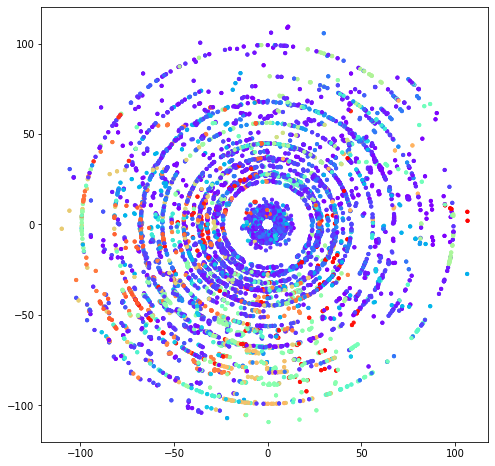

In [24]:
plt.figure(figsize=(8, 8))
plt.scatter(
    hit_global_x[hit_simtrack_match],
    hit_global_y[hit_simtrack_match],
    c=hit_simtrack_index[hit_simtrack_match],
    cmap="rainbow",
    s=10,
);